In [1]:
#Initialising libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import random

In [2]:
#Reading the file
df=pd.read_csv("myexcel.csv.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [3]:
#  In the 'Height' column, the data was incorrectly entered as months and dates, so it was replaced with random numbers
df["Height"]=[random.randint(150,180) for _ in range(len(df))]

In [4]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,161,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,166,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,164,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,168,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,165,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,156,231,Kansas,947276.0


In [5]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
# Since some college names are missing, replace them with "Others"
df["College"]=df["College"].fillna("Others")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,161,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,166,231,Others,5000000.0


In [7]:
# Since salary details are missing replace that with mean value
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,162,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,161,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,166,231,Others,5.000000e+06


In [8]:
#distribution of employees across each team
Count=df.groupby("Team").size()
Count

Team
Atlanta Hawks             15
Boston Celtics            15
Brooklyn Nets             15
Charlotte Hornets         15
Chicago Bulls             15
Cleveland Cavaliers       15
Dallas Mavericks          15
Denver Nuggets            15
Detroit Pistons           15
Golden State Warriors     15
Houston Rockets           15
Indiana Pacers            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Memphis Grizzlies         18
Miami Heat                15
Milwaukee Bucks           16
Minnesota Timberwolves    14
New Orleans Pelicans      19
New York Knicks           16
Oklahoma City Thunder     15
Orlando Magic             14
Philadelphia 76ers        15
Phoenix Suns              15
Portland Trail Blazers    15
Sacramento Kings          15
San Antonio Spurs         15
Toronto Raptors           15
Utah Jazz                 16
Washington Wizards        15
dtype: int64

In [9]:
# Percentage split relative to the total number of employees.
Percentage=(Count*100)/len(df)
Percentage

Team
Atlanta Hawks             3.275109
Boston Celtics            3.275109
Brooklyn Nets             3.275109
Charlotte Hornets         3.275109
Chicago Bulls             3.275109
Cleveland Cavaliers       3.275109
Dallas Mavericks          3.275109
Denver Nuggets            3.275109
Detroit Pistons           3.275109
Golden State Warriors     3.275109
Houston Rockets           3.275109
Indiana Pacers            3.275109
Los Angeles Clippers      3.275109
Los Angeles Lakers        3.275109
Memphis Grizzlies         3.930131
Miami Heat                3.275109
Milwaukee Bucks           3.493450
Minnesota Timberwolves    3.056769
New Orleans Pelicans      4.148472
New York Knicks           3.493450
Oklahoma City Thunder     3.275109
Orlando Magic             3.056769
Philadelphia 76ers        3.275109
Phoenix Suns              3.275109
Portland Trail Blazers    3.275109
Sacramento Kings          3.275109
San Antonio Spurs         3.275109
Toronto Raptors           3.275109
Utah Jazz      

In [10]:
# To validate the correctness of the data.
Percentage.sum()

100.00000000000003

In [11]:
#Create a data frame with team name and percentage 
Team_distribution=pd.DataFrame({"Team":Percentage.index, "Percentage":Percentage.values})
Team_distribution

,Team,Percentage
0,Atlanta Hawks,3.275109
1,Boston Celtics,3.275109
2,Brooklyn Nets,3.275109
3,Charlotte Hornets,3.275109
4,Chicago Bulls,3.275109
5,Cleveland Cavaliers,3.275109
6,Dallas Mavericks,3.275109
7,Denver Nuggets,3.275109
8,Detroit Pistons,3.275109
9,Golden State Warriors,3.275109


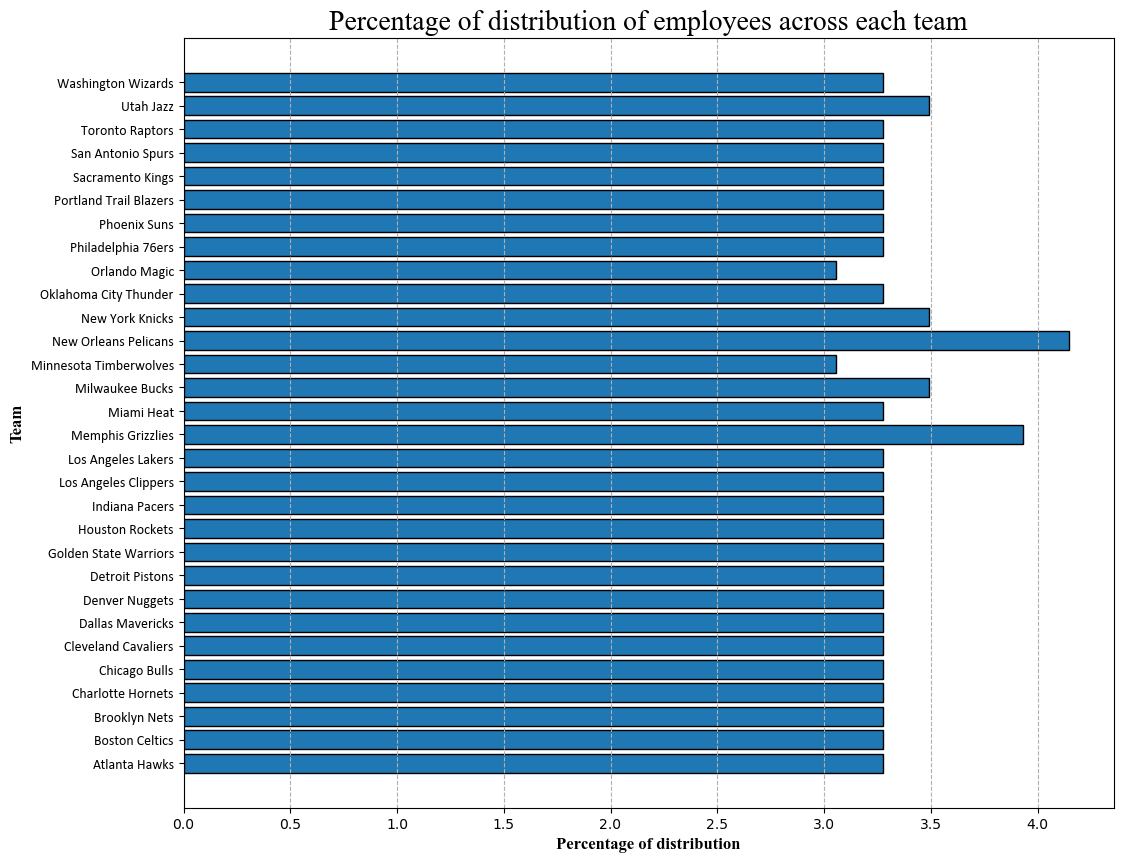

In [12]:
# Graphical Representation: Percentage split
plt.figure(figsize=(12,10))
plt.barh(Team_distribution["Team"],Team_distribution["Percentage"],edgecolor='black',capsize=5)
plt.grid( axis="x",linestyle='--')
plt.xlabel("Percentage of distribution",fontdict={'fontname': 'Times New Roman', 'fontsize': 12},fontweight='bold')
plt.ylabel("Team",fontdict={'fontname': 'Times New Roman', 'fontsize': 12},fontweight='bold')
plt.yticks(fontname='Calibri', fontsize=10)
plt.title("Percentage of distribution of employees across each team",fontdict={'fontname': 'Times New Roman', 'fontsize': 20})
plt.show()

In [13]:
# Segregate employees based on their positions within the company
position = df.groupby("Position").size()
position1=pd.DataFrame({"Position":position.index,"Number of employees":position.values})
position1

,Position,Number of employees
0,C,79
1,PF,100
2,PG,92
3,SF,85
4,SG,102


In [14]:
position_by_salary = df.groupby("Position")["Salary"].mean()
position_by_salary1=pd.DataFrame({"Position":position_by_salary.index,"Average salary":position_by_salary.values})
position_by_salary1

,Position,Average salary
0,C,5.903511e+06
1,PF,4.570628e+06
2,PG,5.067227e+06
3,SF,4.857117e+06
4,SG,4.034100e+06


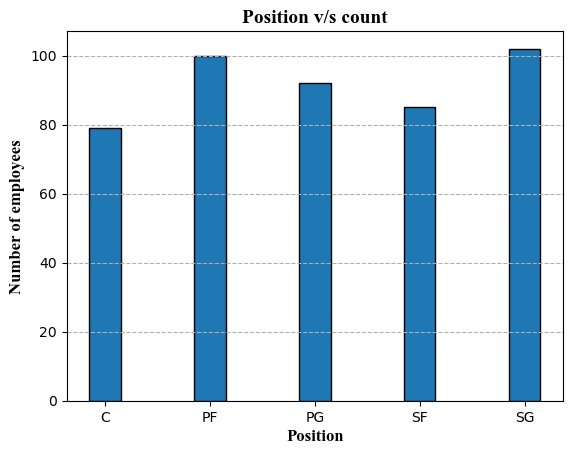

In [35]:
#Graphical representation of number of employees based on their positions within the company
plt.bar(position1["Position"],position1["Number of employees"],width=.3,edgecolor="black")
plt.grid( axis="y",linestyle='--')
plt.xlabel("Position",fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.ylabel("Number of employees",fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.title("Position v/s count",fontdict={"fontname":"Times New Roman","fontsize": 14},fontweight="bold")
plt.show()

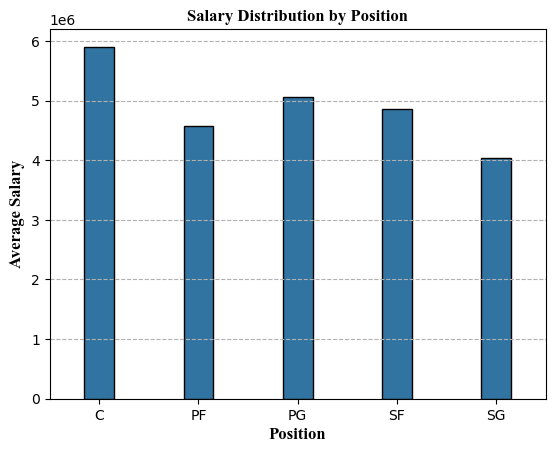

In [16]:
sns.barplot(x="Position", y="Average salary", data=position_by_salary1,width=.3,edgecolor="black")
plt.grid( axis="y",linestyle='--')
plt.title('Salary Distribution by Position',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.xlabel('Position',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.ylabel('Average Salary',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.show()

In [17]:
# Identify the predominant age group among employees.
bins=[15,20,25,30,35,40,45]
labels=["15-20","21-25","26-30","31-35","36-40","41-45"]
df["Age group"]=pd.cut(df["Age"],bins=bins,labels=labels,right=False)
print(df.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     172     180   
1    Jae Crowder  Boston Celtics      99       SF   25     162     235   
2   John Holland  Boston Celtics      30       SG   27     161     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     178     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     166     231   

             College        Salary Age group  
0              Texas  7.730337e+06     26-30  
1          Marquette  6.796117e+06     26-30  
2  Boston University  4.833970e+06     26-30  
3      Georgia State  1.148640e+06     21-25  
4             Others  5.000000e+06     26-30  


In [18]:
age_group=df.groupby(df["Age group"]).size().sort_values(ascending=False)
age_group

C:\Users\Shani\AppData\Local\Temp\ipykernel_14876\954326409.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group=df.groupby(df["Age group"]).size().sort_values(ascending=False)


Age group
26-30    182
21-25    152
31-35     90
36-40     29
41-45      3
15-20      2
dtype: int64

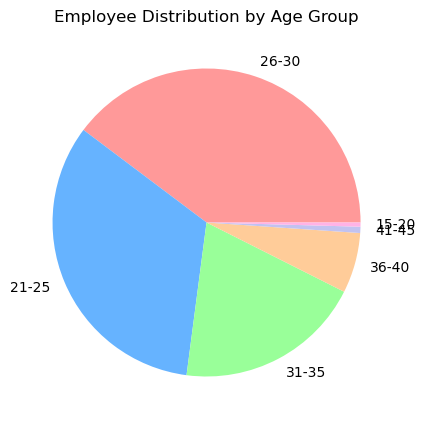

In [19]:
# To represnt  age group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']
plt.figure(figsize=(5,5))
plt.pie(age_group.values,labels=age_group.index,colors=colors)
plt.title('Employee Distribution by Age Group')
plt.show()

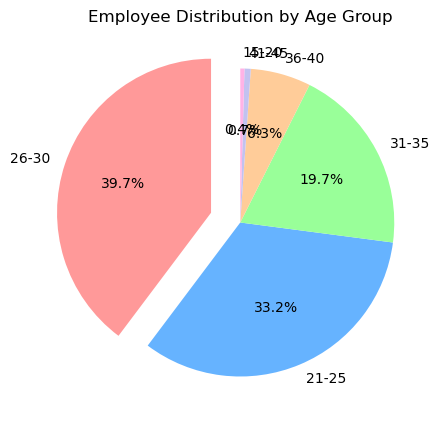

In [20]:
# To highlight the predominant age group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']
max_value = age_group.values.argmax() 
explode=[0.2 if i==max_value else 0 for i in range(len(age_group))]
plt.figure(figsize=(5,5))
plt.pie(age_group.values,labels=age_group.index,colors=colors,explode=explode,autopct="%1.1f%%",startangle=90)
plt.title('Employee Distribution by Age Group')
plt.show()

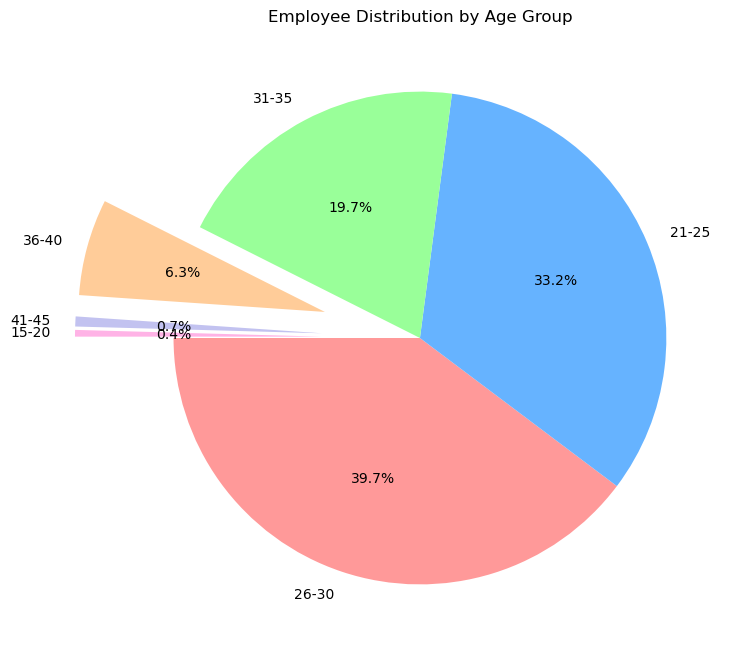

In [21]:
# To highlight age group with minimum number of employee
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']
max_value = np.argsort(age_group.values)[:3] 
explode=[0.4 if i in max_value else 0 for i in range(len(age_group))]
plt.figure(figsize=(8,8))
plt.pie(age_group.values,labels=age_group.index,colors=colors,explode=explode,autopct="%1.1f%%",startangle=180)
plt.title('Employee Distribution by Age Group')
plt.show()

In [22]:
# which team and position have the highest salary expenditure
salary_expenditure=df.groupby(["Team","Position"])["Salary"].sum()
salary_expenditure

Team                Position
Atlanta Hawks       C           22756250.0
                    PF          23952268.0
                    PG           9763400.0
                    SF           6000000.0
                    SG          10431032.0
                                   ...    
Washington Wizards  C           24490429.0
                    PF          11300000.0
                    PG          18022415.0
                    SF          11158800.0
                    SG          11356992.0
Name: Salary, Length: 149, dtype: float64

In [23]:
print(f" Team with highest salary:{salary_expenditure.idxmax()[0]}")
print(f" Position with highest salary: {salary_expenditure.idxmax()[1]}")
print(f" Highest salary:{salary_expenditure.max()}")

 Team with highest salary:Los Angeles Lakers
 Position with highest salary: SF
 Highest salary:31866445.0


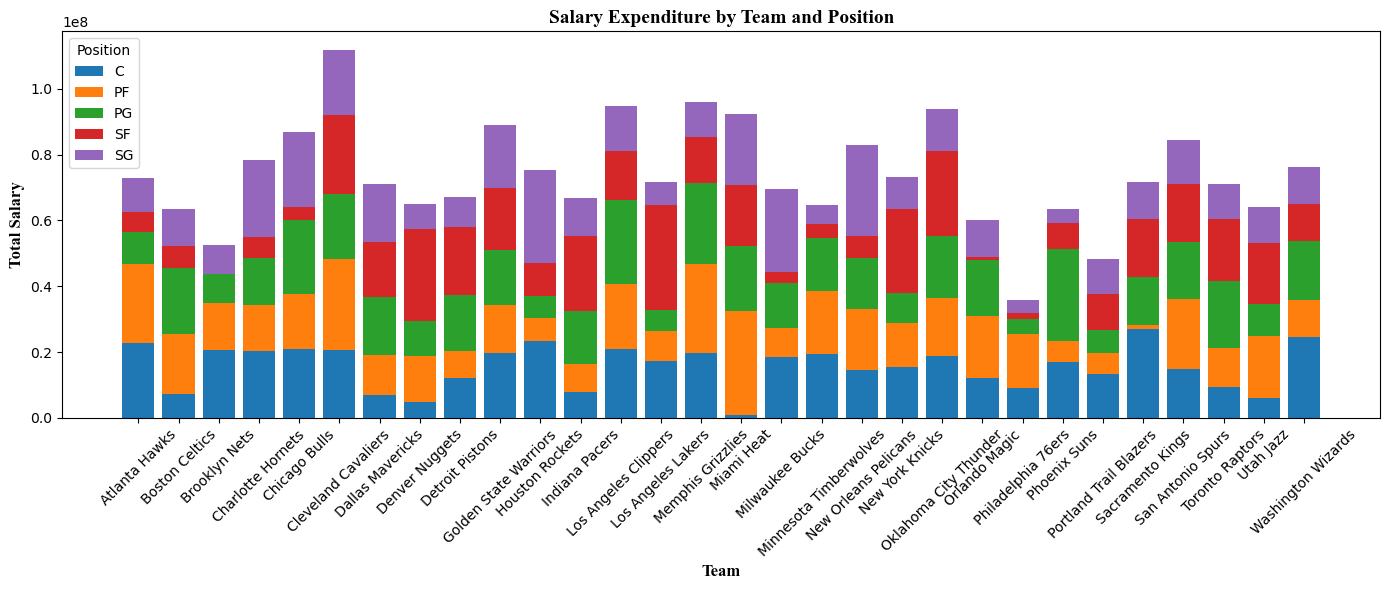

In [30]:
# Pictorial representation
salary_expenditure_df = salary_expenditure.reset_index()           # Reset index to turn Series into DataFrame


salary_expenditure_pivot = salary_expenditure_df.pivot_table(
    index='Team', 
    columns='Position', 
    values='Salary', 
    aggfunc='sum', 
    fill_value=0
)

teams = salary_expenditure_pivot.index
positions = salary_expenditure_pivot.columns
bottoms = [0] * len(teams)

plt.figure(figsize=(14, 6))

for position in positions:
    plt.bar(teams, salary_expenditure_pivot[position], bottom=bottoms, label=position)
    bottoms += salary_expenditure_pivot[position]  # Update bottom for stacking

plt.title('Salary Expenditure by Team and Position',fontdict={"fontname":"Times New Roman","fontsize": 14},fontweight="bold")
plt.xlabel('Team',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.ylabel('Total Salary',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.legend(title='Position')
plt.xticks(rotation=45)  # Rotate team names for readability
plt.tight_layout()
plt.show()


In [33]:
#correlation between age and salary

corelation=df[["Age","Salary"]].corr()
corelation

,Age,Salary
Age,1.00000,0.21117
Salary,0.21117,1.00000


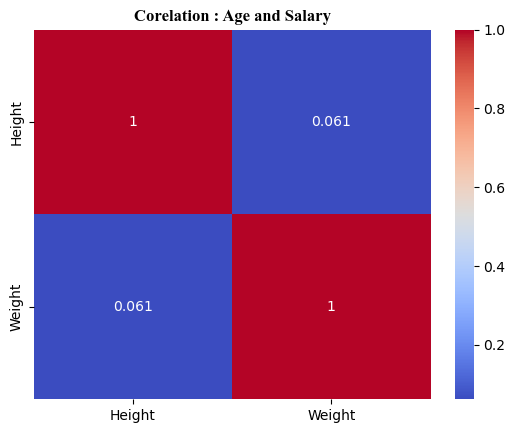

In [43]:
sns.heatmap(corelation,annot=True,cmap="coolwarm")
plt.title("Corelation : Age and Salary",fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.show()

In [ ]:
# Weak Correlation: The relationship is present but not strong enough to be considered significant.

Text(0.5, 1.0, 'Distribution of Height')

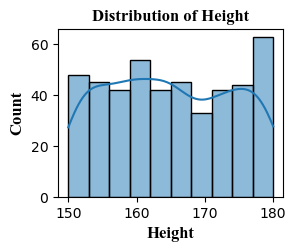

In [39]:
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="Height", kde=True)
plt.xlabel('Height',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.ylabel('Count',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.title('Distribution of Height',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")

Text(0.5, 1.0, 'Distribution of Weight')

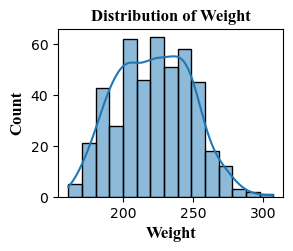

In [40]:
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="Weight", kde=True)
plt.xlabel('Weight',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.ylabel('Count',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.title('Distribution of Weight',fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")

In [41]:
corelation=df[["Height","Weight"]].corr()
corelation

,Height,Weight
Height,1.00000,0.06146
Weight,0.06146,1.00000


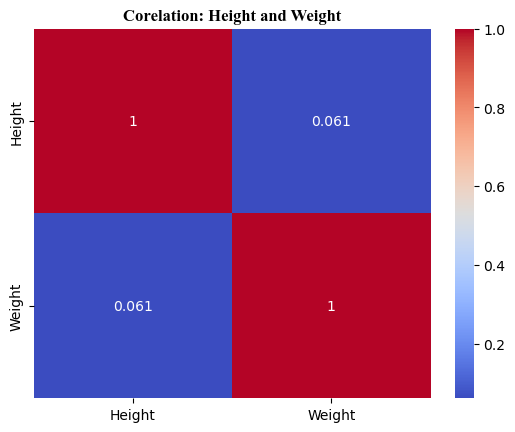

In [44]:
sns.heatmap(corelation,annot=True,cmap="coolwarm")
plt.title("Corelation: Height and Weight",fontdict={"fontname":"Times New Roman","fontsize": 12},fontweight="bold")
plt.show()

In [49]:
#distribution of employees across each team
Count_college=df.groupby("College").size().sort_values(ascending=False)
Count_five=(Count_college[0:5])
Count_five

College
Others            84
Kentucky          22
Duke              20
Kansas            19
North Carolina    16
dtype: int64

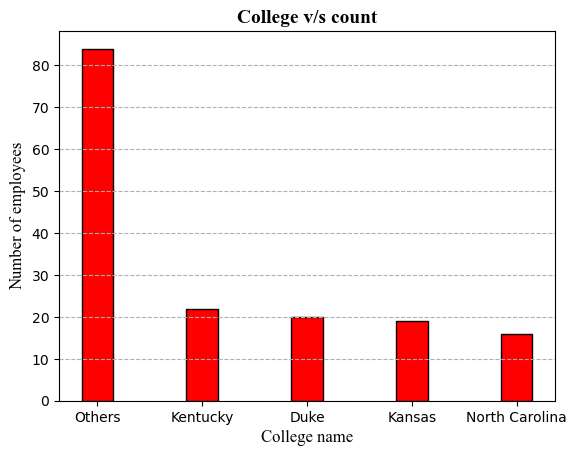

In [54]:
#Graphical representation of number of employees based on their College
plt.bar(Count_five.index,Count_five.values,width=.3,color="r",edgecolor="black")
plt.grid( axis="y",linestyle='--')
plt.xlabel("College name",fontdict={"fontname":"Times New Roman","fontsize": 12})
plt.ylabel("Number of employees",fontdict={"fontname":"Times New Roman","fontsize": 12})
plt.title("College v/s count",fontdict={"fontname":"Times New Roman","fontsize": 14},fontweight="bold")
plt.show()